---------------------------------------------------
### ***Niloufar Abbasi***

***Deep Learning Course***

--------------------------------------------------

## Overview:

In this task, we aim to determine whether individuals are at risk of heart disease based on a set of features related to various heart conditions, using the **Support Vector Machine (SVM)** algorithm.

Support Vector Machines (SVM) are powerful supervised learning algorithms that excel in classification tasks, particularly in scenarios where the data is high-dimensional and complex. By finding the optimal hyperplane that separates different classes in the feature space, SVMs can effectively handle both linear and non-linear relationships within the data. This makes them particularly suited for medical diagnosis applications, such as predicting heart disease, where distinguishing between healthy and at-risk patients is crucial.

We begin by familiarizing ourselves with the dataset through its description file. The first step includes adding a summary of the dataset to this file. Following this, we visualize the information by plotting relevant graphs.

For clarity, each section of the code is explained through in-line comments within the code cells and markdowns outside the cells.

---

# **Dataset description** :

Supervised machine learning algorithms operate on a dataset that is a collection of labeled examples
which consist of features and a label i.e. in our case target is a label and other columns are features, and
each row is an example.
This dataset consists of 11 features and a target variable. It has 6 nominal variables and 5 numeric
variables. The detailed description of all the features are as follows:

1. **Age**: Patients Age in years (Numeric)
2. **Sex**: Gender of patient (Male - 1, Female - 0) (Nominal)
3. **Chest Pain Type**: Type of chest pain experienced by patient categorized into 1 typical, 2 typical
angina, 3 non- anginal pain, 4 asymptomatic (Nominal)
4. **resting BP**: Level of blood pressure at resting mode in mm/HG (Numerical)
5. **cholestrol**: Serum cholestrol in mg/dl (Numeric)
6. **fasting blood sugar**: Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true
and 0 as false (Nominal)
7. **resting ECG**: Result of electrocardiogram while at rest are represented in 3 distinct values 0 :
Normal 1: Abnormality in ST-T wave 2: Left ventricular hypertrophy (Nominal)
8. **max heart rate**: Maximum heart rate achieved (Numeric)
9. **exercise angina**: Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)
10. **oldpeak**: Exercise induced ST-depression in comparison with the state of rest (Numeric)
11. **ST slope**: ST segment measured in terms of slope during peak exercise 0: Normal 1: Upsloping 2: Flat 3: Downsloping (Nominal)


Target variable:
12. **target**: It is the target variable which we have to predict 1 means patient is suffering from heart risk and 0 means patient is normal.
---

### ***Required Libraries***

In [ ]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
#--------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import MinMaxScaler
from sklearn.svm             import SVC
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import precision_score
from sklearn.metrics         import recall_score
from sklearn.metrics         import f1_score
#--------------------------------------------------------
from scipy                   import stats
from tabulate                import tabulate

### ***Loading Data***

In [ ]:
original_dataframe = pd.read_csv('Heart_Disease_Dataset.csv')                   #loading data
original_dataframe.head(10)                                                     # Showing first 10 rows of data

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
5,39,1,3,120,339,0,0,170,0,0.0,1,0
6,45,0,2,130,237,0,0,170,0,0.0,1,0
7,54,1,2,110,208,0,0,142,0,0.0,1,0
8,37,1,4,140,207,0,0,130,1,1.5,2,1
9,48,0,2,120,284,0,0,120,0,0.0,1,0


---

### **(A) Data Overview**

In this section, I provide an overview of the dataset. The relevant information is organized and presented clearly.

Additionally, I have plotted several graphs to enhance the understanding of the data.

Any content that goes beyond the primary requirements is clearly marked with appropriate comments.


In [ ]:
original_dataframe.describe()                                                   # generating statistical summary

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


---

### **i.** Data Size

---


In [ ]:
original_dataframe.shape                                                        # obtain the number of rows and columns in the DataFrame

(1190, 12)

In [ ]:
#######################################################################################
# This cell contains additional information beyond the scope of the original question.#
#######################################################################################

original_dataframe.dtypes                                                       # Show the data types for each column

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

By executing the previous cell, it was confirmed that there are no non-numeric values in the dataset. Therefore, there is no need for data encoding. This information was mentioned in the dataset description, but this cell was executed for verification purposes.

---

### **ii.** Checking for Missing Features in Each Sample

---

In [ ]:
original_dataframe.isnull().sum()    #check for null values in the dataset

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

As can be seen from the obtained numbers (0), there are no missing values in the DataFrame.


---

### **iii.** Checking for Balance

---

In [ ]:
original_dataframe['target'].value_counts()                                     #Count the occurrences of 1 شand 0 in the 'target' column

1    629
0    561
Name: target, dtype: int64

By executing the previous cell, it is clear that out of the 1190 labels present, 629 are labeled as 1, indicating that the patient is at risk, while 561 labels are 0, representing a normal condition. Additionally, graphs have been plotted to enhance the understanding of this aspect. The number of labels in both groups is approximately equal, indicating that the data is balanced.

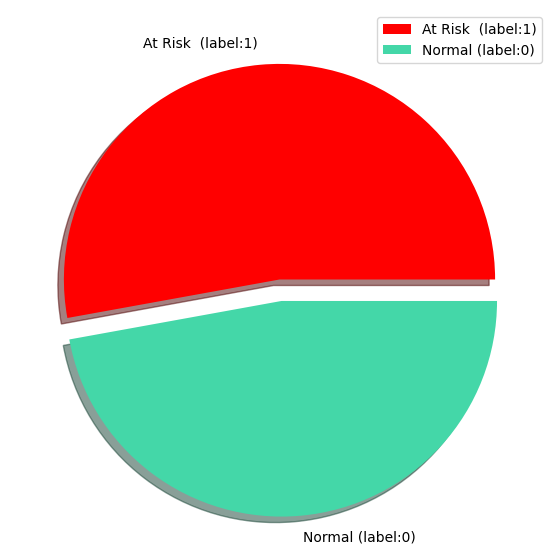

In [ ]:
#plotting

plt.figure(figsize=(7,7))                                                       #figure with a size of 7x7
class_count=original_dataframe['target'].value_counts()
label=['At Risk  (label:1)', 'Normal (label:0)']
color=['Red','#44d7a8']
explode=[0,0.1]
plt.pie(class_count,explode=explode,labels=label,colors=color,shadow=True)
plt.legend()
plt.show()

Another representation of the data balance is illustrated below.

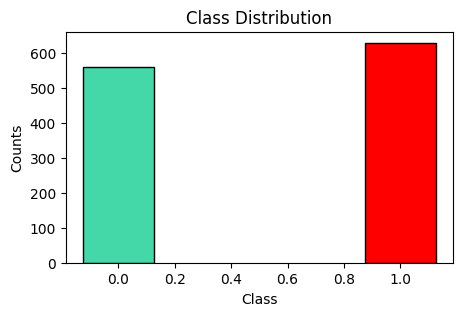

In [ ]:
####################################################################################
# This cell contains an alternative approach for visualizing the data distribution #
####################################################################################
plt.figure(figsize=(5,3))
# Plotting the class distribution
plt.bar(class_count.index, class_count.values, color=color, width=0.25, edgecolor='black')
plt.xlabel('Class')
plt.ylabel('Counts')
plt.title('Class Distribution')
plt.show()

---

### **iv.** Plotting Age Distribution and Gender Distribution for Each Class (four plots)

---

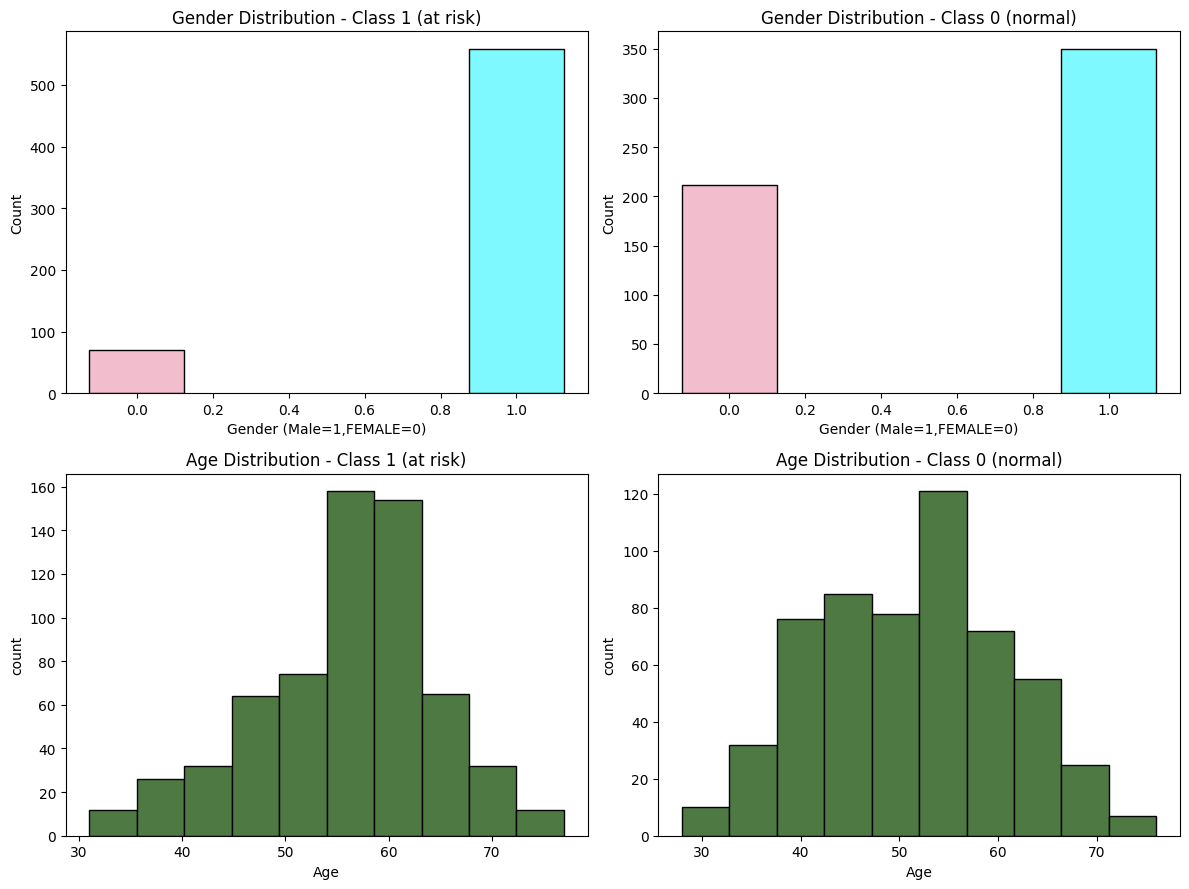

In [ ]:
gender_color = ['#7df9ff', '#f2bdcd']                                           # f2bdcd : light pink and 7df9ff : light blue
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))                     # Set up subplots

# Plot gender distribution for class 1
axes[0,0].bar(original_dataframe[original_dataframe['target'] == 1]['sex'].value_counts().index, original_dataframe[original_dataframe['target'] == 1]['sex'].value_counts().values,
              color=gender_color, width=0.25, edgecolor='black')
axes[0,0].set_title ('Gender Distribution - Class 1 (at risk)')
axes[0,0].set_xlabel('Gender (Male=1,FEMALE=0)')
axes[0,0].set_ylabel('Count')

# Plot gender distribution for class 0
axes[0,1].bar(original_dataframe[original_dataframe['target'] == 0]['sex'].value_counts().index, original_dataframe[original_dataframe['target'] == 0]['sex'].value_counts().values,
              color=gender_color, width=0.25, edgecolor='black')
axes[0,1].set_title ('Gender Distribution - Class 0 (normal)')
axes[0,1].set_xlabel('Gender (Male=1,FEMALE=0)')
axes[0,1].set_ylabel('Count')

# Plot age distribution for class 1
axes[1,0].hist(original_dataframe[original_dataframe['target'] == 1]['age'], bins=10, color='#4f7942', edgecolor='black')
axes[1,0].set_title ('Age Distribution - Class 1 (at risk)')
axes[1,0].set_xlabel('Age'  )
axes[1,0].set_ylabel('count')

# Plot age distribution for class 0
axes[1,1].hist(original_dataframe[original_dataframe['target'] == 0]['age'], bins=10, color='#4f7942', edgecolor='black')
axes[1,1].set_title ('Age Distribution - Class 0 (normal)')
axes[1,1].set_xlabel('Age'  )
axes[1,1].set_ylabel('count')

plt.tight_layout()                                                              # Adjust spacing between subplots
plt.show()                                                                      # Show the plots

***Note:***

*   Age: Patients Age in years

*   Sex: Gender of patient (Male - 1, Female - 0)

*   class: It is the target variable. 1 means patient is suffering from heart risk and 0 means patient is normal

#### For Better Understanding:


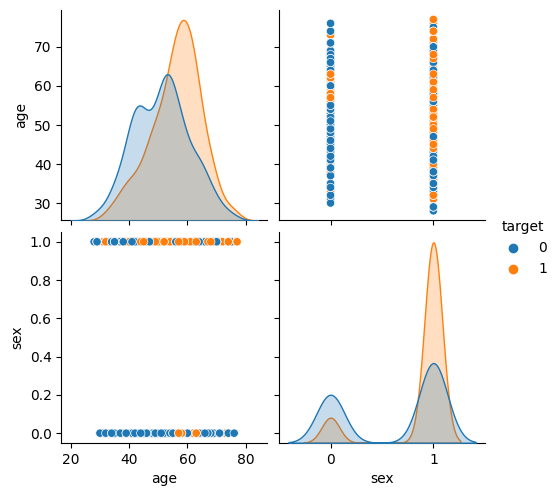

In [ ]:
#######################################################################################
# This cell contains additional information beyond the scope of the original question.#
#######################################################################################
sns.pairplot(original_dataframe, hue = 'target', vars = ['age', 'sex'] )

--------------------------------------------------------------------------------
### **(B) Outlier Removal using Z-test**

In this section, we need to remove the outliers using the "Z-test."


In [ ]:
original_dataframe.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [ ]:
z = np.abs(stats.zscore(original_dataframe))                   # Calc z-scores of numeric columns in the dataset
z_df = pd.DataFrame(z, columns=original_dataframe.columns)     # زcreate a DataFrame with the z-scores

z_df = z_df.round(3)                                           # Round the numeric columns to 3 decimal places

ellipsis_row = ['...'] * len(z_df.columns)                     #Add ellipsis to every column ( at the end of the column)
z_df_ellipsis = pd.concat([z_df.head(40), pd.DataFrame([ellipsis_row], columns=z_df.columns)])

z_df_ellipsis = z_df_ellipsis.reset_index(drop=True)
print(tabulate(z_df_ellipsis, headers='keys', tablefmt='pretty', showindex=True)) #table - results

+----+-------+-------+-----------------+--------------+-------------+---------------------+-------------+----------------+-----------------+---------+----------+--------+
|    |  age  |  sex  | chest pain type | resting bp s | cholesterol | fasting blood sugar | resting ecg | max heart rate | exercise angina | oldpeak | ST slope | target |
+----+-------+-------+-----------------+--------------+-------------+---------------------+-------------+----------------+-----------------+---------+----------+--------+
| 0  | 1.467 | 0.556 |      1.318      |    0.427     |    0.776    |        0.521        |    0.803    |     1.265      |      0.795      |  0.85   |  1.023   | 1.059  |
| 1  | 0.505 | 1.799 |      0.249      |    1.517     |     0.3     |        0.521        |    0.803    |     0.638      |      0.795      |  0.071  |  0.616   | 0.944  |
| 2  | 1.787 | 0.556 |      1.318      |    0.117     |    0.716    |        0.521        |    0.347    |     1.636      |      0.795      |  0.8

In [ ]:
threshold = 3                                                        # Defining threshold for filtering outliers (given in the question)
outlier_indices = np.where(z > threshold)                            # Find the indices of the outliers
outlier_tuples = list(zip(outlier_indices[0], outlier_indices[1]))   # Convert the indices to tuples

print("Outlier indices:")                                            # Print the outlier tuples
for index in outlier_tuples:
    print(index)

Outlier indices:
(30, 4)
(76, 4)
(109, 3)
(149, 4)
(167, 9)
(242, 3)
(325, 9)
(366, 3)
(371, 7)
(391, 7)
(400, 3)
(450, 3)
(593, 3)
(618, 4)
(704, 9)
(734, 3)
(761, 3)
(773, 9)
(793, 9)
(852, 9)
(978, 9)
(1010, 9)
(1013, 3)
(1039, 4)
(1070, 9)
(1075, 3)
(1078, 9)
(1172, 9)


In [ ]:
filtered_dataframe = original_dataframe.copy()                   # making a copy of original df
filtered_dataframe = filtered_dataframe[(z < 3).all(axis=1)]     # filter the df
filtered_dataframe.shape                                         # shape of filtered df

(1162, 12)

In [ ]:
print('The shape of original data frame was ', original_dataframe.shape)
print('The shape of filtered data frame is  ', filtered_dataframe.shape)        #compare

The shape of original data frame was  (1190, 12)
The shape of filtered data frame is   (1162, 12)


---

### **(C) Data Normalization**

Now, for this section, we need to normalize the numeric data (scale it between zero and one).


In the first section, we checked and confirmed that all the data provided in the dataset is numeric. Therefore, in this section, we only need to normalize the data.



**From the Statistical Learning course last semester and the Deep Learning course this semester, we know that training data and test data should not be normalized together. In other words, the data as a whole should not be used for normalization, as we understand that test data should not be seen before testing and must remain absent throughout all stages. If we normalize the test and training data together without separation, we inadvertently account for the effect of test data on other data, compromising the integrity of unseen test data. This effect may vary in magnitude, but it is inherently incorrect. However, we can split the data into two parts, normalize both, and then allocate a portion of the training data to evaluation data, which is acceptable.**


In [ ]:
X = filtered_dataframe.drop(['target'],axis=1)   # Create 'X' by dropping the target column from filtered df
y = filtered_dataframe['target']                 # Create 'y' containing the target column from filtered df

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3,shuffle=True, random_state=42) # Split the data

print('Training Set:' )
print(X_train.shape   )
print(y_train.shape   )

print('\nTest Set:   ')
print(X_test.shape    )
print(y_test.shape    )

Training Set:
(813, 11)
(813,)

Test Set:   
(349, 11)
(349,)


In [ ]:
scaler = MinMaxScaler()
X_train[['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope']] = scaler.fit_transform(X_train[['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope']])
X_train.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
393,0.666667,1.0,1.000000,0.431818,0.000000,0.0,1.0,0.355556,0.0,0.333333,0.666667
243,0.541667,1.0,0.333333,0.772727,0.623932,1.0,0.0,0.562963,1.0,0.666667,0.666667
1152,0.270833,1.0,1.000000,0.500000,0.673077,0.0,0.0,0.429630,1.0,0.633333,0.666667
534,0.708333,1.0,1.000000,0.204545,0.538462,0.0,0.5,0.540741,1.0,0.666667,0.666667
3,0.395833,0.0,1.000000,0.522727,0.457265,0.0,0.0,0.303704,1.0,0.583333,0.666667


In [ ]:
scaler = MinMaxScaler()
X_test[['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope']] = scaler.fit_transform(X_test[['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope']])
X_test.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
682,0.604167,1.0,1.000000,0.666667,0.562118,0.0,1.0,0.323308,1.0,0.32,0.5
963,0.666667,1.0,1.000000,0.428571,0.525458,0.0,1.0,0.541353,1.0,0.76,0.5
419,0.666667,1.0,1.000000,0.495238,0.443992,0.0,0.5,0.533835,1.0,0.50,1.0
1140,0.479167,0.0,0.666667,0.380952,0.600815,0.0,1.0,0.661654,0.0,0.32,0.0
507,0.979167,1.0,1.000000,0.533333,0.458248,0.0,0.0,0.323308,1.0,0.80,0.5


---

### **(D)**

The separation of data for training and testing was performed in section (C), and the necessary explanations have been provided. I explained why I decided to separate the data in the previous section and then normalize each group. In summary, this approach is correct because even in normalization, the effect of test data on training data is not applied, and the test data remains genuinely unseen, even though their values have all been normalized between zero and one.

Now, we will perform training **using different kernels** for **Support Vector Machines (SVM)**:

1. *Linear*
2. *RBF*
3. *Polynomial*


In this section, the objective is to adjust the parameters for each kernel in order to achieve the highest accuracy.


In [ ]:
# Split the training data into training and validation sets
X_subtrain, X_val, y_subtrain, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=True, random_state=42)

### **Linear Kernel :**

In [ ]:
C_values = [0.001, 0.01,0.05, 0.1, 1, 10]                                       # declare a range of C values to test
linear_accuracy_list=[]                                                         # empty list

for C in C_values:
    svm_classifier = SVC(C=C, kernel='linear')                                  # Create an SVM classifier with a linear kernel
    svm_classifier.fit(X_subtrain, y_subtrain)                                  # Train the classifier on the sub training data
    y_pred_linear = svm_classifier.predict(X_val)                               # make predictions on the validation data
    linear_accuracy = accuracy_score(y_val, y_pred_linear)                      # Evaluate the accuracy of the classifier on validation data to find best C
    linear_accuracy_list.append(linear_accuracy)

for i in range (len(C_values)):
    print(f"C =   {C_values[i]:<8} , accuracy: {linear_accuracy_list[i]}")      #results


C =   0.001    , accuracy: 0.573170731707317
C =   0.01     , accuracy: 0.8170731707317073
C =   0.05     , accuracy: 0.8780487804878049
C =   0.1      , accuracy: 0.8658536585365854
C =   1        , accuracy: 0.8658536585365854
C =   10       , accuracy: 0.8658536585365854


In [ ]:
max_accuracy = max(linear_accuracy_list)                                        # Find the maximum accuracy and its corresponding C value
max_index    = linear_accuracy_list.index(max_accuracy)
best_C       = C_values[max_index]

best_svm_classifier = SVC(C=best_C, kernel='linear')                            # Retrain the model using the best C value on the combined training and validation data
best_svm_classifier.fit(np.concatenate((X_subtrain, X_val)), np.concatenate((y_subtrain, y_val)))

y_pred_test   = best_svm_classifier.predict(X_test)                             # Make predictions on the test data
accuracy_test = accuracy_score(y_test, y_pred_test)                             # Evaluate the accuracy of the classifier on the test set

import warnings
warnings.filterwarnings('ignore')                                               # Settings the warnings to be ignored

print("Best C:"                     , best_C       )
print("\nMaximum Validation Accuracy:", max_accuracy )
print("Test Accuracy              :", accuracy_test)

Best C: 0.05

Maximum Validation Accuracy: 0.8780487804878049
Test Accuracy              : 0.8022922636103151


In [ ]:
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_test)
recall    = recall_score   (y_test, y_pred_test)
f1        = f1_score       (y_test, y_pred_test)

print("--------------Linear Kernel------------"    )
print("Best C:                     ", best_C       )
print("---------------------------------------"    )
print("Maximum Validation Accuracy:", max_accuracy )
print("Test Accuracy               ", accuracy_test)
print("---------------------------------------"    )
print("Precision:                  ", precision    )
print("Recall:                     ", recall       )
print("F1 Score:                   ", f1           )

--------------Linear Kernel------------
Best C:                      0.05
---------------------------------------
Maximum Validation Accuracy: 0.8780487804878049
Test Accuracy                0.8022922636103151
---------------------------------------
Precision:                   0.869281045751634
Recall:                      0.7307692307692307
F1 Score:                    0.7940298507462685


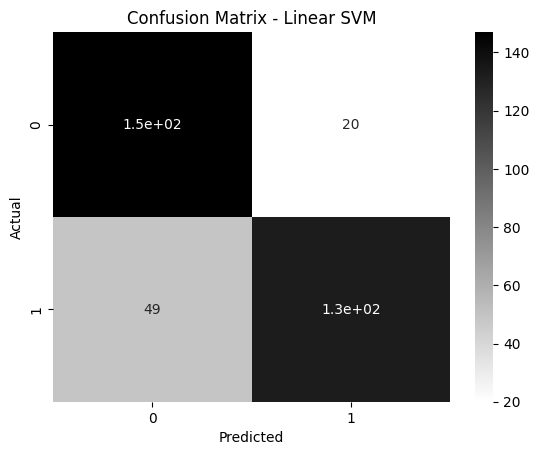

In [ ]:
#######################################################################################
# This cell contains additional information beyond the scope of the original question.#
#######################################################################################
CM_Linear=confusion_matrix(y_test,y_pred_test)
sns.heatmap(CM_Linear, annot=True, cmap='binary')
plt.xlabel('Predicted'                    )
plt.ylabel('Actual'                       )
plt.title ('Confusion Matrix - Linear SVM')
plt.show()

As observed, the main diagonal of our confusion matrix is highlighted, while the secondary diagonal is comparatively less filled and lighter. We know that the more prominent the main diagonal (in this case, the darker it is), the better the classification performance.


### **RBF Kernel**

In [ ]:
gamma_values      = [0.001, 0.1,0.5, 1,3,5,7, 10,100,10000]                       # Declare a range of gamma values to test
rbf_accuracy_list = []                                                          #empty list for future use

for gamma in gamma_values:
    rbf_classifier = SVC(kernel='rbf', gamma = gamma)                           # Create an SVM classifier with a rbf kernel
    rbf_classifier.fit(X_subtrain, y_subtrain)                                  # Train the classifier on the sub training data
    y_pred_rbf     = rbf_classifier.predict(X_val)                              # Make predictions on the   validation data
    rbf_accuracy   = accuracy_score(y_val, y_pred_rbf)                          # Evaluate the accuracy of the classifier
    rbf_accuracy_list.append(rbf_accuracy)

for i in range (len(gamma_values)):
    print(f"gamma =   {gamma_values[i]:<8} , RBF_accuracy: {rbf_accuracy_list[i]}")


gamma =   0.001    , RBF_accuracy: 0.573170731707317
gamma =   0.1      , RBF_accuracy: 0.8658536585365854
gamma =   0.5      , RBF_accuracy: 0.8780487804878049
gamma =   1        , RBF_accuracy: 0.8902439024390244
gamma =   3        , RBF_accuracy: 0.8780487804878049
gamma =   5        , RBF_accuracy: 0.8780487804878049
gamma =   7        , RBF_accuracy: 0.9024390243902439
gamma =   10       , RBF_accuracy: 0.9024390243902439
gamma =   100      , RBF_accuracy: 0.8292682926829268
gamma =   10000    , RBF_accuracy: 0.7195121951219512


In [ ]:
rbf_max_accuracy = max(rbf_accuracy_list)                                       # Find the maximum accuracy and its corresponding gamma value
rbf_max_index    = rbf_accuracy_list.index(rbf_max_accuracy)
best_gamma       = gamma_values[rbf_max_index]

best_rbf_classifier = SVC(kernel='rbf', gamma = best_gamma)                     # Retrain the model using the best C value on the combined training and validation data
best_rbf_classifier.fit(np.concatenate((X_subtrain, X_val)), np.concatenate((y_subtrain, y_val)))
y_pred_rbf_test     = best_rbf_classifier.predict(X_test)                       # Make predictions on the test data
rbf_accuracy_test   = accuracy_score(y_test, y_pred_rbf_test)                   # Evaluate the accuracy of the classifier on the test set

print("Best gamma:"                 , best_gamma       )
print("Maximum Validation Accuracy:", rbf_max_accuracy )
print("Test Accuracy:"              , rbf_accuracy_test)

Best gamma: 7
Maximum Validation Accuracy: 0.9024390243902439
Test Accuracy: 0.8452722063037249


In [ ]:
# Calculate precision, recall, and F1 score
rbf_precision = precision_score(y_test, y_pred_rbf_test)
rbf_recall    = recall_score   (y_test, y_pred_rbf_test)
rbf_f1        = f1_score       (y_test, y_pred_rbf_test)

print("----------------RBF Kernel---------------------")
print("Best gamma:                 ", best_gamma       )
print("-----------------------------------------------")
print("Maximum Validation Accuracy:", rbf_max_accuracy )
print("Test Accuracy               ", rbf_accuracy_test)
print("-----------------------------------------------")
print("Precision:                  ", rbf_precision    )
print("Recall:                     ", rbf_recall       )
print("F1 Score:                   ", rbf_f1           )

----------------RBF Kernel---------------------
Best gamma:                  7
-----------------------------------------------
Maximum Validation Accuracy: 0.9024390243902439
Test Accuracy                0.8452722063037249
-----------------------------------------------
Precision:                   0.8595505617977528
Recall:                      0.8406593406593407
F1 Score:                    0.8499999999999999


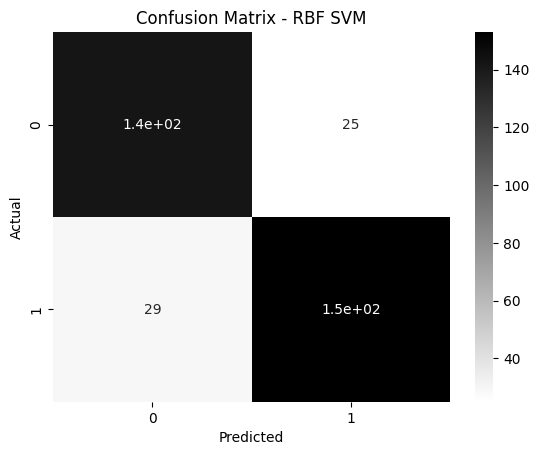

In [ ]:
#######################################################################################
# This cell contains additional information beyond the scope of the original question.#
#######################################################################################
CM_RBF=confusion_matrix(y_test,y_pred_rbf_test)
sns.heatmap(CM_RBF, annot=True, cmap='binary')
plt.xlabel('Predicted'                    )
plt.ylabel('Actual'                       )
plt.title ('Confusion Matrix - RBF SVM'   )
plt.show()

### **Polynomial Kernel**

In [ ]:
degrees = [1,3,5,7,9,11]                                                        # Declare a range of degrees to find the best one
poly_accuracy_list=[]                                                           #empty list

for degree in degrees:
    poly_classifier = SVC(kernel='poly', degree=degree)                         # Create an SVM classifier with a polynomial kernel
    poly_classifier.fit(X_subtrain, y_subtrain)                                 # Train the classifier on the training data
    y_pred_poly     = poly_classifier.predict(X_val)                            #Make predictions on thevalidation data
    poly_accuracy   = accuracy_score(y_val, y_pred_poly)                        # Evaluate the accuracy of the classifie
    poly_accuracy_list.append(poly_accuracy)

for i in range (len(degrees)):
    print(f"degree =   {degrees[i]:<8} , poly_accuracy: {poly_accuracy_list[i]}")

degree =   1        , poly_accuracy: 0.8658536585365854
degree =   3        , poly_accuracy: 0.9146341463414634
degree =   5        , poly_accuracy: 0.8902439024390244
degree =   7        , poly_accuracy: 0.8902439024390244
degree =   9        , poly_accuracy: 0.8536585365853658
degree =   11       , poly_accuracy: 0.8536585365853658


In [ ]:
poly_max_accuracy = max(poly_accuracy_list)                                     # Find the maximum accuracy and its corresponding degree
poly_max_index = poly_accuracy_list.index(poly_max_accuracy)
best_degree =degrees[poly_max_index]

best_poly_classifier = SVC(kernel='poly', degree=best_degree)                   # Retrain the model using the best degree on the combined training and validation data
best_poly_classifier.fit(np.concatenate((X_subtrain, X_val)), np.concatenate((y_subtrain, y_val)))

y_pred_poly_test = best_poly_classifier.predict(X_test)                         # Make predictions on the test data
poly_accuracy_test = accuracy_score(y_test, y_pred_poly_test)                   # Evaluate the accuracy of the classifier on the test set

print("Best degree                :", best_degree       )
print("Maximum Validation Accuracy:", poly_max_accuracy )
print("Test Accuracy              :", poly_accuracy_test)

Best degree                : 3
Maximum Validation Accuracy: 0.9146341463414634
Test Accuracy              : 0.828080229226361


In [ ]:
# Calculate precision, recall, and F1 score
poly_precision = precision_score(y_test, y_pred_poly_test)
poly_recall    = recall_score   (y_test, y_pred_poly_test)
poly_f1        = f1_score       (y_test, y_pred_poly_test)

print("--------------Polynomial Kernel--------------"   )
print("Best degree:                ", best_degree       )
print("---------------------------------------------"   )
print("Maximum Validation Accuracy:", poly_max_accuracy )
print("Test Accuracy               ", poly_accuracy_test)
print("---------------------------------------------"   )
print("Precision:                  ", poly_precision    )
print("Recall:                     ", poly_recall       )
print("F1 Score:                   ", poly_f1           )

--------------Polynomial Kernel--------------
Best degree:                 3
---------------------------------------------
Maximum Validation Accuracy: 0.9146341463414634
Test Accuracy                0.828080229226361
---------------------------------------------
Precision:                   0.9295774647887324
Recall:                      0.7252747252747253
F1 Score:                    0.8148148148148148


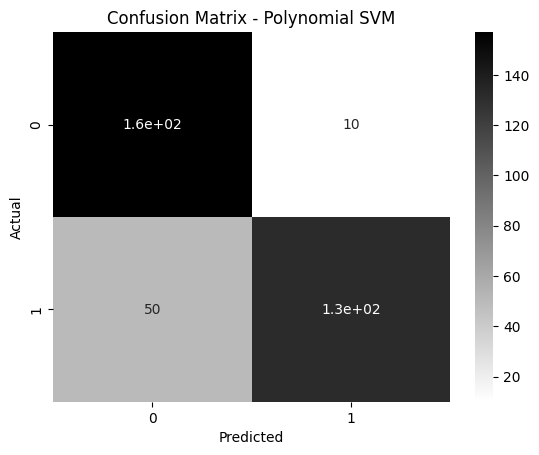

In [ ]:
#######################################################################################
# This cell contains additional information beyond the scope of the original question.#
#######################################################################################
CM_poly=confusion_matrix(y_test,y_pred_poly_test)
sns.heatmap(CM_poly, annot=True, cmap='binary')
plt.xlabel('Predicted'                           )
plt.ylabel('Actual'                              )
plt.title ('Confusion Matrix - Polynomial SVM'   )
plt.show()